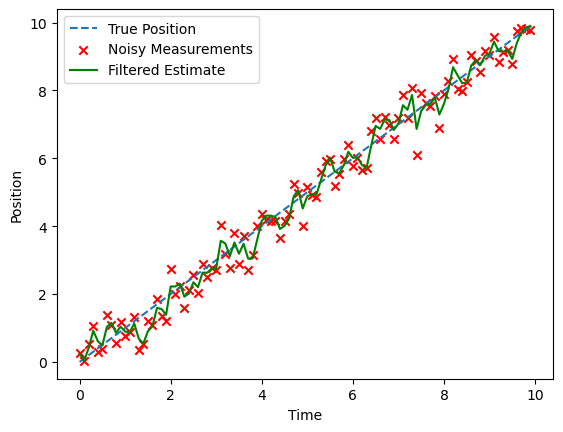

In [5]:
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

# Define the true motion parameters
initial_position = 0
velocity = 1
process_noise = 0.1

# Simulate noisy measurements
np.random.seed(42)
true_position = initial_position + velocity * np.arange(0, 10, 0.1)
noisy_measurements = true_position + np.random.normal(0, 0.5, size=len(true_position))

# Initialize Kalman filter
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.F = np.array([[1, 1],
                 [0, 1]])  # State transition matrix
kf.H = np.array([[1, 0]])  # Measurement matrix
kf.P *= 1e3  # Covariance matrix
kf.R = 0.5  # Measurement noise
kf.Q = np.array([[0.1, 0.1],
                 [0.1, 0.1]])  # Process noise

# Initialize state
kf.x = np.array([0, 0])

# Kalman filter update
filtered_state_means_kf = []
for measurement in noisy_measurements:
    kf.predict()
    kf.update(measurement)
    filtered_state_means_kf.append(kf.x[0])

# Plot the true position, noisy measurements, and filtered estimates
plt.plot(np.arange(0, 10, 0.1) * velocity, true_position, label='True Position', linestyle='dashed')
plt.scatter(np.arange(0, 10, 0.1) * velocity, noisy_measurements, label='Noisy Measurements', color='red', marker='x')
plt.plot(np.arange(0, 10, 0.1) * velocity, filtered_state_means_kf, label='Filtered Estimate', color='green')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

In [6]:
measurement


9.782706433312427

In [7]:
import numpy as np

from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt

def fx(x, dt):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    F = np.array([[1, dt, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, dt],
                  [0, 0, 0, 1]], dtype=float)
    return np.dot(F, x)
def hx(x):
   # measurement function - convert state into a measurement
   # where measurements are [x_pos, y_pos]
   return np.array([x[0], x[2]])
dt = 0.1
# create sigma points to use in the filter. This is standard for Gaussian processes
points = MerweScaledSigmaPoints(4, alpha=.1, beta=2., kappa=-1)
kf = UnscentedKalmanFilter(dim_x=4, dim_z=2, dt=dt, fx=fx, hx=hx, points=points)
kf.x = np.array([-1., 1., -1., 1]) # initial state
kf.P *= 0.2 # initial uncertainty
z_std = 0.1
kf.R = np.diag([z_std**2, z_std**2]) # 1 standard
kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01**2, block_size=2)
zs = [[i+np.random.randn()*z_std, i+np.random.randn()*z_std] for i in range(50)] # measurements
for z in zs:
    kf.predict()
    kf.update(z)
    print(kf.x, 'log-likelihood', kf.log_likelihood)

[-0.17731363  1.07155311 -0.08253319  1.08093731] log-likelihood -3.3794422049844406
[0.48832031 2.06240755 0.50765773 1.93627556] log-likelihood -41.160276984563865
[1.30838017 3.91268529 1.33881783 3.85803438] log-likelihood -88.40049220742468
[2.4057977  6.12387081 2.33775335 5.77795325] log-likelihood -100.09281432508054
[3.48644891 7.44793722 3.41608312 7.1932674 ] log-likelihood -56.07038828483097
[4.48625995 8.07929739 4.51644095 8.13660667] log-likelihood -27.82568170147088
[5.58833691 8.71719952 5.70870757 8.95767015] log-likelihood -37.260791023072485
[6.65974552 9.09987859 6.76772088 9.27051187] log-likelihood -11.659866796328105
[7.72141022 9.35938757 7.76171249 9.38504248] log-likelihood -4.686309240302648
[8.80804597 9.59183214 8.82388433 9.57579519] log-likelihood -9.341114369352875
[9.86294165 9.72608988 9.82062281 9.63072423] log-likelihood -1.5342643535554372
[10.92285818  9.8383125  10.8055042   9.65875685] log-likelihood -1.089723740705562
[11.94748226  9.8866791  1

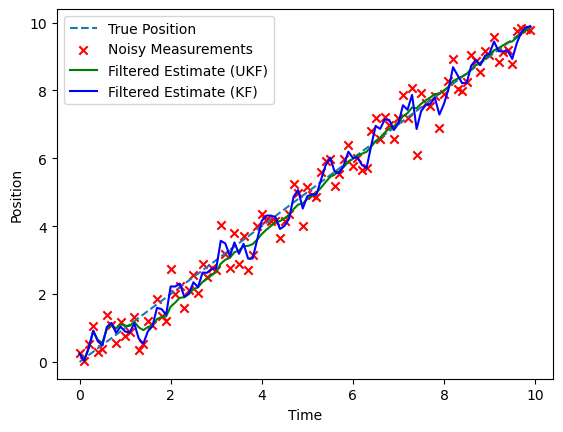

In [8]:
import numpy as np
from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt

# Define the true motion parameters
initial_position = 0
velocity = 1
process_noise = 0.1

# Simulate noisy measurements
np.random.seed(42)
true_position = initial_position + velocity * np.arange(0, 10, 0.1)
noisy_measurements = true_position + np.random.normal(0, 0.5, size=len(true_position))

# Define the state transition function and measurement function
def fx(x, dt):
    # State transition function
    return np.array([x[0] + x[1] * dt, x[1]])

def hx(x):
    # Measurement function
    return np.array([x[0]])

# Specify sigma points using MerweScaledSigmaPoints
points = MerweScaledSigmaPoints(n=2, alpha=1e-3, beta=2, kappa=0)

# Initialize Unscented Kalman Filter
ukf = UnscentedKalmanFilter(dim_x=2, dim_z=1, dt=0.1, fx=fx, hx=hx, points=points)
ukf.x = np.array([0, 1])  # Initial state
ukf.P *= 1e3  # Covariance matrix
ukf.R = 0.5  # Measurement noise
ukf.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=process_noise)  # Process noise

# Unscented Kalman filter update
filtered_state_means = []
for measurement in noisy_measurements:
    ukf.predict()
    ukf.update(np.array([measurement]))  # Ensure the measurement is a 1D array
    filtered_state_means.append(ukf.x[0])

# Plot the true position, noisy measurements, and filtered estimates
plt.plot(np.arange(0, 10, 0.1), true_position, label='True Position', linestyle='dashed')
plt.scatter(np.arange(0, 10, 0.1), noisy_measurements, label='Noisy Measurements', color='red', marker='x')
plt.plot(np.arange(0, 10, 0.1), filtered_state_means, label='Filtered Estimate (UKF)', color='green')
plt.plot(np.arange(0, 10, 0.1) * velocity, filtered_state_means_kf, label='Filtered Estimate (KF)', color='blue')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

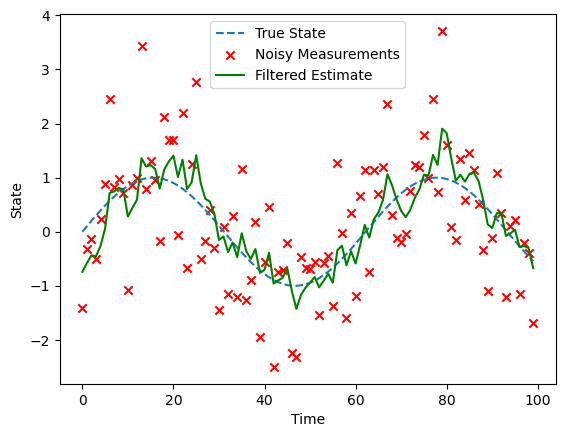

In [9]:
def ho_kalman_filter(z, Q, R, P0, A, H, B=None, u=None):
    """
    Ho-Kalman filter implementation.

    Parameters:
    - z: Measurement vector
    - Q: Process noise covariance matrix
    - R: Measurement noise covariance matrix
    - P0: Initial state covariance matrix
    - A: State transition matrix
    - H: Measurement matrix
    - B: Control input matrix (optional)
    - u: Control input vector (optional)

    Returns:
    - filtered_states: List of filtered state estimates
    """

    n = len(A)
    m = len(H[0])

    # Initialize variables
    x_hat = np.zeros((n, 1))  # Initial state estimate
    P = P0

    filtered_states = []

    for measurement in z:
        # Prediction step
        x_hat_minus = A @ x_hat
        P_minus = A @ P @ A.T + Q

        # Update step
        K = P_minus @ H.T @ np.linalg.inv(H @ P_minus @ H.T + R)
        x_hat = x_hat_minus + K @ (measurement - H @ x_hat_minus)
        P = (np.eye(n) - K @ H) @ P_minus

        filtered_states.append(x_hat.flatten())

    return np.array(filtered_states)

# Example usage:
# Define system matrices
A = np.array([[1]])
H = np.array([[1]])

# Measurement noise covariance
R = np.array([[1]])

# Process noise covariance
Q = np.array([[0.1]])

# Initial state covariance
P0 = np.array([[1]])

# Simulate a true state and noisy measurements
true_state = np.sin(np.linspace(0, 10, 100))
measurements = true_state + np.random.normal(0, np.sqrt(R[0, 0]), size=len(true_state))

# Apply the Ho-Kalman filter
filtered_states = ho_kalman_filter(measurements, Q, R, P0, A, H)

# Plot the true state, measurements, and filtered estimates
plt.plot(true_state, label='True State', linestyle='dashed')
plt.scatter(range(len(measurements)), measurements, label='Noisy Measurements', color='red', marker='x')
plt.plot(filtered_states, label='Filtered Estimate', color='green')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.show()


In [ ]:
def ho_kalman(signal, dt):
    '''
    Perform the Ho-Kalman algorithm (Eigensystem Realization Algorithm (ERA)) from discrete impulse response data

    Input:
        signal: Vibration data (time x output), input output method
        dt: Time step size (s)

    Returns:

    '''
    t

In [14]:
import numpy as np
from scipy.linalg import eig

def ho_kalman_era(data, dof, dt):
    """
    Perform Ho-Kalman/ERA to identify modal parameters.

    Parameters:
    - data: Dynamic strain data matrix (rows are time, columns are sensor locations)
    - dof: Number of degrees of freedom (number of modes to be identified)
    - dt: Time step between measurements

    Returns:
    - frequencies: Modal frequencies
    - damping_ratios: Damping ratios
    - mode_shapes: Mode shapes
    """

    # Step 1: Generate the Hankel matrix
    L = len(data)
    m = len(data[0])
    p = L - 1

    Hankel = np.zeros((p, p))
    

    for i in range(p):
        Hankel[:, i] = np.concatenate([data[i+1:i+p+1, 0], np.zeros(i)])

    size = int(np.floor(p/2))-1
    # H(0)
    Hankel_0 = Hankel[:size, :size]
    # H(1)
    Hankel_1 = Hankel[1:size+1, 1:size+1]

    # Step 2: Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(Hankel_0)

    # Step 3: State sequence matrix
    A = np.dot(np.linalg.pinv(np.sqrt(np.diag(S))) * U.T, Hankel_1) @ Vt.T @ np.linalg.pinv(np.sqrt(np.diag(S)))
    # Step 4: Eigendecomposition
    eigenvalues, eigenvectors = eig(A)

    # Step 5: Extract modal parameters
    frequencies = np.angle(eigenvalues) / dt
    # print(np.abs(eigenvalues))
    damping_ratios = -np.real(eigenvalues) / np.abs(eigenvalues)
    mode_shapes = eigenvectors[:m, :dof]

    return frequencies, damping_ratios, mode_shapes



# Example data 
strain_data = np.random.rand(100, 4)  # 100 time steps, 4 sensor locations
num_dof = 3  # Number of degrees of freedom to identify

# Call the Ho-Kalman/ERA function
identified_frequencies, identified_damping_ratios, identified_mode_shapes = ho_kalman_era(strain_data, num_dof, dt=1.0)

# Print the results
print("Identified Modal Frequencies:", identified_frequencies)
print("Identified Damping Ratios:", identified_damping_ratios)
print("Identified Mode Shapes:", identified_mode_shapes)

Identified Modal Frequencies: [ 2.78990186 -2.78990186  1.23694967 -1.23694967  2.12423907 -2.12423907
  0.7379079  -0.7379079   0.55040983 -0.55040983  0.06298805 -0.06298805
  1.85135176 -1.85135176  2.53322065 -2.53322065  0.          0.
  1.35932496 -1.35932496  1.02001073 -1.02001073  2.03641155 -2.03641155
  1.55543862 -1.55543862  0.13343971 -0.13343971  0.71724312 -0.71724312
  1.08366109 -1.08366109  3.14159265  2.5391106  -2.5391106   1.97777722
 -1.97777722  3.14159265  2.88268408 -2.88268408  0.93427055 -0.93427055
  1.86652011 -1.86652011  3.14159265  0.          2.5772936  -2.5772936 ]
Identified Damping Ratios: [ 0.9387916   0.9387916  -0.32767972 -0.32767972  0.52561915  0.52561915
 -0.73987762 -0.73987762 -0.85231024 -0.85231024 -0.99801691 -0.99801691
  0.27688941  0.27688941  0.82057955  0.82057955 -1.         -1.
 -0.20989872 -0.20989872 -0.52335681 -0.52335681  0.44897262  0.44897262
 -0.0153571  -0.0153571  -0.99111012 -0.99111012 -0.75362072 -0.75362072
 -0.46809